In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-marketing.csv')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [7]:
categorical_columns = [column for column in df.columns[:-1] if df[column].dtype == "O"]
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [8]:
for column in categorical_columns:
    print("Unique values in",column,"=", df[column].unique())

Unique values in job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital = ['married' 'single' 'divorced']
Unique values in education = ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in targeted = ['yes' 'no']
Unique values in default = ['no' 'yes']
Unique values in housing = ['yes' 'no']
Unique values in loan = ['no' 'yes']
Unique values in contact = ['unknown' 'cellular' 'telephone']
Unique values in month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome = ['unknown' 'failure' 'other' 'success']


In [9]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [10]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [11]:
print("Mean : ",df['pdays'].mean ())
print("Median : ",df['pdays'].median ())
print("Mode : ",df['pdays'].mode ()[0])

Mean :  40.19782796222158
Median :  -1.0
Mode :  -1


In [12]:
df[df['pdays'] != -1]['pdays'].count()

8257

"pdays" column signifies No. of days passed after the client was contacted from previous campaign. If value is -1 i.e. It is an outlier because no. of days passed can't be negative.

# Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values

In [13]:
print("Mean of pdays column after eliminating -1 values is", df[df['pdays'] != -1]['pdays'].mean() )
print("Median of pdays column after eliminating -1 values is", df[df['pdays'] != -1]['pdays'].median() )

Mean of pdays column after eliminating -1 values is 224.57769165556496
Median of pdays column after eliminating -1 values is 194.0


After skipping the outlier -1 mean and median values are changed to a much extent.

# Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:ylabel='education'>

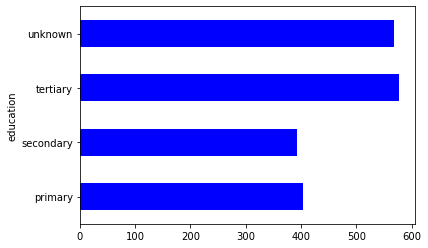

In [14]:
df.groupby("education")['balance'].median().plot.barh(color='b')

Tertiary education level has the highest median.

# Make a box plot for pdays. Do you see any outliers?

<function matplotlib.pyplot.show(close=None, block=None)>

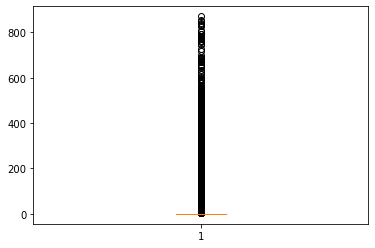

In [15]:
plt.boxplot(df['pdays'])
plt.show

In [16]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [18]:
df.response.replace({'no':0,'yes':1} ,inplace = True)

In [19]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
response,0.025155,0.020012,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


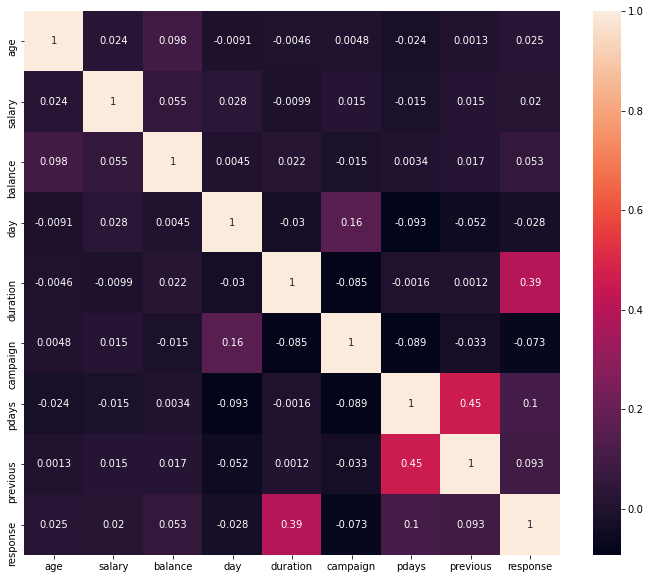

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True);

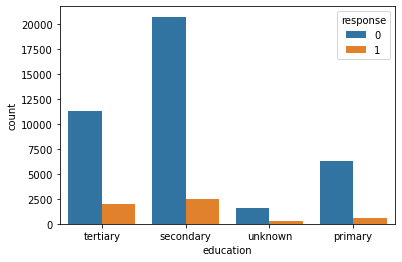

In [22]:
sns.countplot(x='education',data=df,hue=df['response']);

# Are pdays and poutcome associated with the target?

In [23]:
#sns.pairplot(df,hue='response');

# Associations of categorical variables

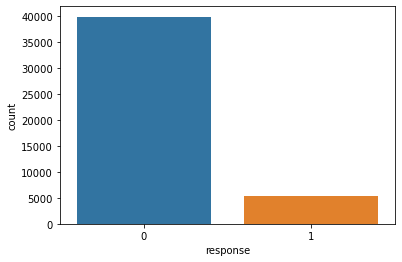

In [24]:
sns.countplot(x='response', data=df);

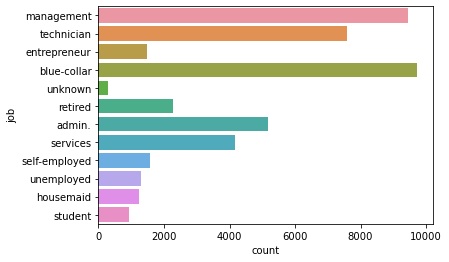

In [25]:
sns.countplot(y='job', data=df);

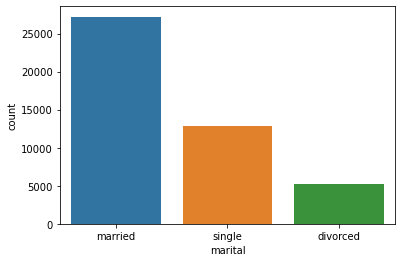

In [26]:
sns.countplot(x='marital', data=df);

# Are the features about the previous campaign data useful?

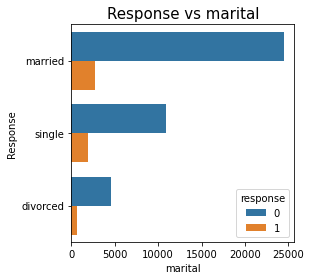

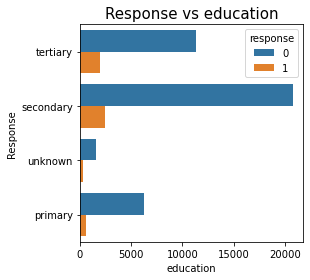

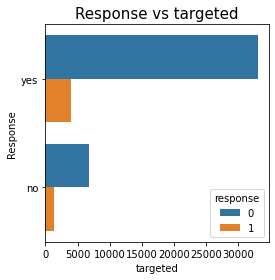

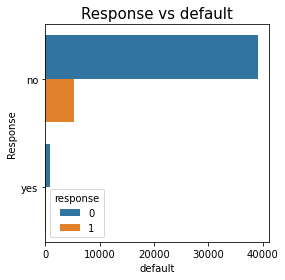

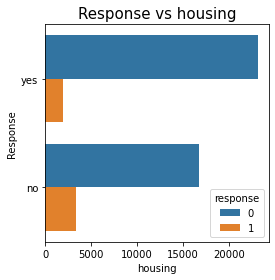

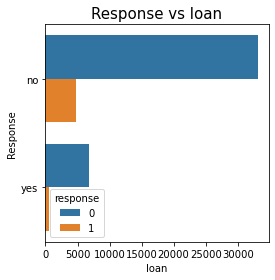

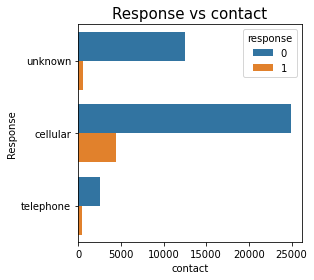

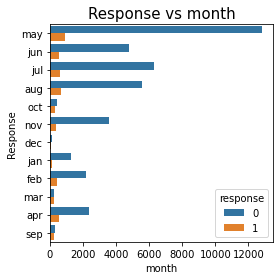

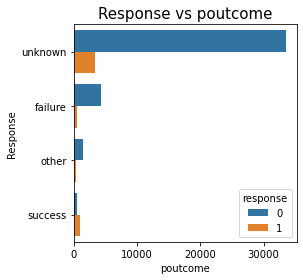

In [27]:
for col in categorical_columns[1:]:
    plt.figure(figsize=(4,4))
    sns.countplot(y=df[col],hue=df["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

'poutcome' column is not assosciated with target column because it has more than 80% missing values.

In [28]:

df.drop('poutcome',axis=1,inplace=True)

In [29]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [30]:

df['previous'].value_counts().head()

0    36954
1     2772
2     2106
3     1142
4      714
Name: previous, dtype: int64

# how do you handle the pdays column with a value of -1 where the previous campaign data is missing?

In [31]:
df['pdays_no_contact'] = np.where(df['pdays']==-1,1,0)
df['pdays_no_contact'].value_counts()

1    36954
0     8257
Name: pdays_no_contact, dtype: int64

We created a new column since majority of users were not previously contacted. We are capturing importance of missing values.

# Handling Missing Values in Categorical columns

In [32]:
categorical_columns

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [33]:
for column in categorical_columns[:-1]:
    print(df[column].value_counts(),"\n")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

yes    37091
no      8120
Name: targeted, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 



Missing Values are represented as Unknown which is better way to handle missing data by becoming a new category itself rather than imputing it with the mode of the particular column.

# Handling Outliers in the Data.

In [34]:
num_columns = [col for col in df.columns if col not in categorical_columns]
print(num_columns)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response', 'pdays_no_contact']


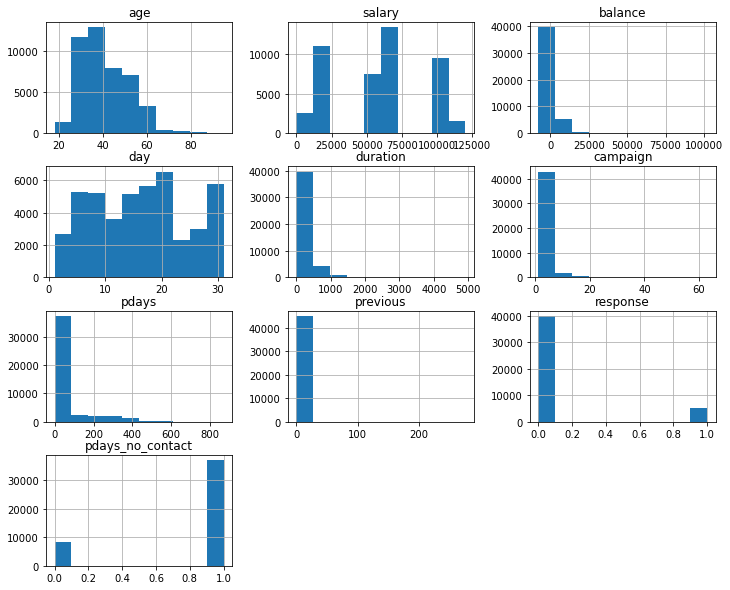

In [35]:
dist=df.hist(figsize=(12,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x19b234a7a60>,
 'caps': [<matplotlib.lines.Line2D at 0x19b2278f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b234a7a90>],
 'medians': [<matplotlib.lines.Line2D at 0x19b23513e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b235138e0>],
 'means': []}

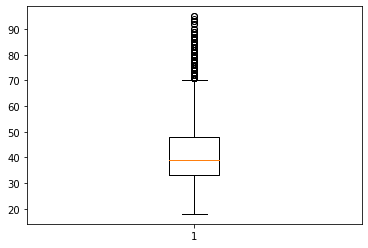

In [36]:
plt.boxplot(df['age'])

In [37]:
q1,q2,q3 = np.quantile(df['age'], 0.25), np.quantile(df['age'], 0.50), np.quantile(df['age'], 0.75)
IQR = q3 - q1
uw,lw = q3 + (1.5 * IQR),q1 - (1.5 * IQR)

In [38]:
print(q1,q2,q3)
print(IQR)
print(uw,lw)

33.0 39.0 48.0
15.0
70.5 10.5


In [39]:
df['age'] = np.where(df['age'] > uw, uw, df['age'])
df['age'] = np.where(df['age']< lw, lw, df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19b2359fd30>,
 'caps': [<matplotlib.lines.Line2D at 0x19b2359f5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b2359fa30>],
 'medians': [<matplotlib.lines.Line2D at 0x19b2352a5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b2352abe0>],
 'means': []}

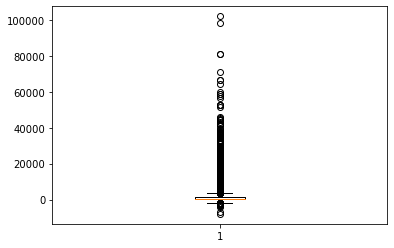

In [40]:
plt.boxplot(df['balance'])

In [41]:
q1,q2,q3 = np.quantile(df['balance'], 0.25), np.quantile(df['balance'], 0.50), np.quantile(df['balance'], 0.75)
IQR = q3 - q1
uw,lw = q3 + (1.5 * IQR),q1 - (1.5 * IQR)

In [42]:
print(q1,q2,q3)
print(IQR)
print(uw,lw)

72.0 448.0 1428.0
1356.0
3462.0 -1962.0


In [43]:
df['balance'] = np.where(df['balance'] > uw, uw, df['balance'])
df['balance'] = np.where(df['balance'] < lw, lw, df['balance'])

# Handling Categorical columns.

In [44]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58.0,management,100000,married,tertiary,yes,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,0,1
1,44.0,technician,60000,single,secondary,yes,no,29.0,yes,no,unknown,5,may,151,1,-1,0,0,1
2,33.0,entrepreneur,120000,married,secondary,yes,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,47.0,blue-collar,20000,married,unknown,no,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,0,1
4,33.0,unknown,0,single,unknown,no,no,1.0,no,no,unknown,5,may,198,1,-1,0,0,1


In [45]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [46]:
dictionary={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}

df['month']=df['month'].map(dictionary)

In [47]:

df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [48]:
df1 = df.copy()
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58.0,management,100000,married,tertiary,yes,no,2143.0,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44.0,technician,60000,single,secondary,yes,no,29.0,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33.0,entrepreneur,120000,married,secondary,yes,no,2.0,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47.0,blue-collar,20000,married,unknown,no,no,1506.0,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33.0,unknown,0,single,unknown,no,no,1.0,no,no,unknown,5,5,198,1,-1,0,0,1


In [49]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,response,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58.0,100000,2143.0,5,5,261,1,-1,0,0,...,0,0,1,0,1,0,1,0,0,1
1,44.0,60000,29.0,5,5,151,1,-1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,33.0,120000,2.0,5,5,76,1,-1,0,0,...,0,1,0,0,1,0,1,1,0,1
3,47.0,20000,1506.0,5,5,92,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,33.0,0,1.0,5,5,198,1,-1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [50]:
df1.shape

(45211, 33)

In [51]:
df1.loc[df1['pdays']==-1,'pdays']=0
df1['pdays'].head()

0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64

# Feature Selection

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_ns,y_ns)

ExtraTreesClassifier()

In [63]:
print(model.feature_importances_)

[0.05460312 0.01291983 0.05861501 0.05507206 0.07013983 0.18553057
 0.03873162 0.01969196 0.01215658 0.04751738 0.00677318 0.00247885
 0.00281181 0.00579879 0.00592168 0.00489024 0.00411387 0.00424277
 0.00648291 0.00267402 0.00091988 0.05319895 0.03588813 0.02215525
 0.02239553 0.0130397  0.02080329 0.00305545 0.09208701 0.0366169
 0.01287588 0.08579794]


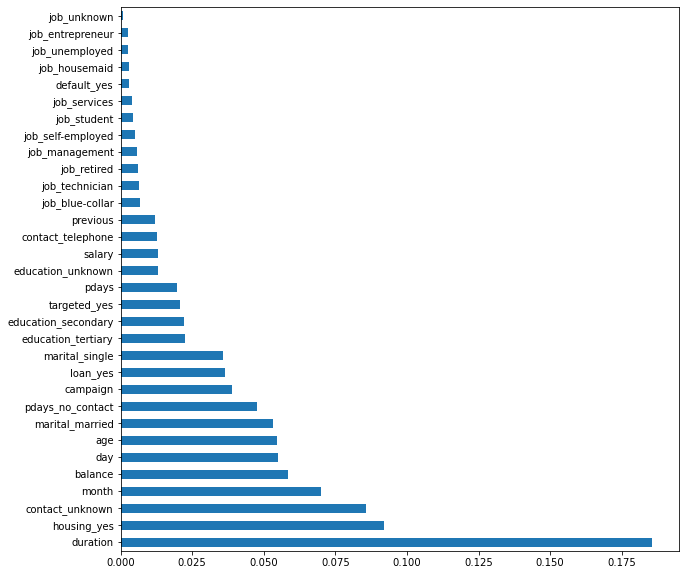

In [64]:
plt.figure(figsize=(10,10))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(32).plot(kind='barh');

# Handling Imbalanced Dataset

Percentage of subsription :  11.698480458295547
Percentage of no subscription :  88.30151954170445


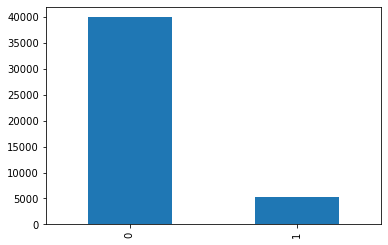

In [53]:
No_sub = len(df[df['response'] == 0])
Sub = len(df[df['response'] == 1])
percent_No_sub = (No_sub/len(df['response'])) * 100
percent_sub = (Sub/len(df['response'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['response'].value_counts().plot.bar();

In [54]:
from imblearn.combine import SMOTETomek

In [55]:
X = df1.drop('response',axis=1)
y = df1['response']

In [58]:
from collections import Counter
os = SMOTETomek(1)
X_ns,y_ns = os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))


The number of classes before fit Counter({0: 39922, 1: 5289})
The number of classes after fit Counter({0: 38655, 1: 38655})


In [59]:
y_ns.value_counts()

1    38655
0    38655
Name: response, dtype: int64

In [60]:

X_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58.0,100000,2143.0,5,5,261,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1
1,44.0,60000,29.0,5,5,151,1,0,0,1,...,1,1,0,0,1,0,1,0,0,1
2,33.0,120000,2.0,5,5,76,1,0,0,1,...,0,1,0,0,1,0,1,1,0,1
3,47.0,20000,1506.0,5,5,92,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,33.0,0,1.0,5,5,198,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


# Feature Selection for model development

In [66]:
job = 'job_'+df['job'].unique()

In [67]:
job

array(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired', 'job_admin.',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'], dtype=object)

In [68]:
X_ns.drop(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'],axis=1,inplace=True)

In [69]:
'marital_'+df['marital'].unique()

array(['marital_married', 'marital_single', 'marital_divorced'],
      dtype=object)

In [70]:

X_ns.drop(['marital_married', 'marital_single'],axis=1,inplace=True)

In [71]:

X_ns.drop(['targeted_yes', 'default_yes'],axis=1,inplace=True)

In [72]:
X_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58.0,100000,2143.0,5,5,261,1,0,0,1,0,1,0,1,0,0,1
1,44.0,60000,29.0,5,5,151,1,0,0,1,1,0,0,1,0,0,1
2,33.0,120000,2.0,5,5,76,1,0,0,1,1,0,0,1,1,0,1
3,47.0,20000,1506.0,5,5,92,1,0,0,1,0,0,1,1,0,0,1
4,33.0,0,1.0,5,5,198,1,0,0,1,0,0,1,0,0,0,1


In [73]:
X_ns.shape

(77310, 17)

In [74]:
y_ns.shape

(77310,)

# Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()
### fit vs fit_transform
scaler.fit_transform(X_ns)

array([[ 1.53777117,  1.31194014,  0.88431597, ..., -0.32704551,
        -0.2069815 ,  2.18586983],
       [ 0.26318766,  0.06944535, -0.85019587, ..., -0.32704551,
        -0.2069815 ,  2.18586983],
       [-0.73827082,  1.93318753, -0.87234905, ...,  3.05767846,
        -0.2069815 ,  2.18586983],
       ...,
       [-0.0208976 ,  1.93318753, -1.04259616, ..., -0.32704551,
        -0.2069815 , -0.45748378],
       [-0.47038282,  0.06944535, -0.81510554, ..., -0.32704551,
        -0.2069815 , -0.45748378],
       [-1.27004263, -1.17304944, -0.8239804 , ..., -0.32704551,
        -0.2069815 , -0.45748378]])

In [77]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_ns),columns=X_ns.columns)
X_scaled.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,1.537771,1.311940,0.884316,-1.322045,-0.433079,-0.331495,-0.522646,-0.492764,-0.337376,0.630621,-0.838772,1.638846,-0.161662,1.247752,-0.327046,-0.206982,2.18587
1,0.263188,0.069445,-0.850196,-1.322045,-0.433079,-0.652378,-0.522646,-0.492764,-0.337376,0.630621,1.192219,-0.610185,-0.161662,1.247752,-0.327046,-0.206982,2.18587
2,-0.738271,1.933188,-0.872349,-1.322045,-0.433079,-0.871162,-0.522646,-0.492764,-0.337376,0.630621,1.192219,-0.610185,-0.161662,1.247752,3.057678,-0.206982,2.18587
3,0.536313,-1.173049,0.361665,-1.322045,-0.433079,-0.824488,-0.522646,-0.492764,-0.337376,0.630621,-0.838772,-0.610185,6.185757,1.247752,-0.327046,-0.206982,2.18587
4,-0.738271,-1.794297,-0.873170,-1.322045,-0.433079,-0.515274,-0.522646,-0.492764,-0.337376,0.630621,-0.838772,-0.610185,6.185757,-0.801441,-0.327046,-0.206982,2.18587


# Model Development

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y_ns, test_size=0.3, random_state=0)

In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [82]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9920  1579]
 [ 1494 10200]]
0.8675031259431725
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11499
           1       0.87      0.87      0.87     11694

    accuracy                           0.87     23193
   macro avg       0.87      0.87      0.87     23193
weighted avg       0.87      0.87      0.87     23193



# Cross Validation

In [83]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_scaled,y_ns,cv=15)

score

array([0.79181218, 0.80170741, 0.94295693, 0.93694218, 0.91133101,
       0.89095848, 0.88766007, 0.85933256, 0.9016298 , 0.85021343,
       0.69712844, 0.83391541, 0.86340706, 0.87252619, 0.72273962])

In [84]:
score.mean()

0.8509507178890184

# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[10528   971]
 [  641 11053]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11499
           1       0.92      0.95      0.93     11694

    accuracy                           0.93     23193
   macro avg       0.93      0.93      0.93     23193
weighted avg       0.93      0.93      0.93     23193

0.9304962704264218


# Hyperparameter Optimization

In [88]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,15)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 80, 151, 222, 292, 363, 434, 504, 575, 646, 717, 787, 858, 929, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [89]:
clf_randomcv = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
clf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=20,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 80, 151, 222, 292,
                                                      363, 434, 504, 575, 646,
                                                      717, 787, 858, 929,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=100, verbose=2)

In [90]:
clf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=858, max_features='log2',
                       n_estimators=30, random_state=0)

In [91]:
clf_randomcv.best_score_

0.928506753885101

In [92]:
clf_randomcv.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 858,
 'criterion': 'entropy'}

In [93]:
clf_best_random = clf_randomcv.best_estimator_

In [94]:
y_pred = clf_best_random.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[10478  1021]
 [  586 11108]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     11499
           1       0.92      0.95      0.93     11694

    accuracy                           0.93     23193
   macro avg       0.93      0.93      0.93     23193
weighted avg       0.93      0.93      0.93     23193

0.930711852714181


# K-Fold cross validation

In [95]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf_best_random,X_scaled,y_ns,cv=15)

score

array([0.75708188, 0.83779589, 0.9476135 , 0.96080714, 0.95362825,
       0.91637563, 0.9282111 , 0.91327125, 0.95750873, 0.90434614,
       0.79569267, 0.63174234, 0.87039193, 0.89173458, 0.66298021])

In [96]:
score.mean()

0.8619454145647393